# Figure Sandbox
Test out figure code before dumping it into my dissertation

In [1]:
from fractions import Fraction

import numpy as np
from scipy.interpolate import splev
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn
import astropy.units as u
import astropy.constants as const
import fiasco
from fiasco.util import vectorize_where
import roman
from synthesizAR.instruments import InstrumentSDOAIA

%matplotlib inline

In [56]:
col = fiasco.IonCollection(*[fiasco.Element(el, [1e6,1e7,1e8]*u.K) for el in fiasco.list_elements()])

In [61]:
wave = np.logspace(-1.5,3,100)*u.angstrom
brem = col.free_free(wave)

In [60]:
col.temperature

<Quantity [1.e+06, 1.e+07, 1.e+08] K>

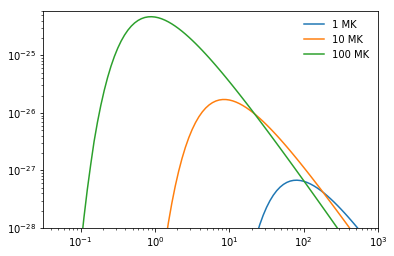

In [65]:
#fe = fiasco.Element('Fe',[1e6,1e7,1e8]*u.K)


for i in range(brem.shape[0]):
    plt.plot(wave,brem[i,:],label=f'{fe.temperature[i].to(u.MK).value:.0f} MK')
plt.yscale('log')
plt.ylim(1e-28,6e-25)
plt.xscale('log')
plt.xlim(wave[[0,-1]].value)
plt.legend(frameon=False)

In [21]:
brem.unit

Unit("cm3 erg / (Angstrom s)")

In [2]:
aia = InstrumentSDOAIA([0,1]*u.s,None)

In [16]:
aia.channels[0]

{'wavelength': <Quantity 94. Angstrom>,
 'telescope_number': 4,
 'gaussian_width': {'x': <Quantity 0.951 pix>, 'y': <Quantity 0.951 pix>},
 'name': '94',
 'instrument_label': 'AIA_4',
 'wavelength_range': None,
 'temperature_response_spline': (array([1.00000000e+04, 1.00000000e+04, 1.00000000e+04, 1.00000000e+04,
         1.25892510e+04, 1.41253789e+04, 1.58489248e+04, 1.77827949e+04,
         1.99526328e+04, 2.23872070e+04, 2.51188691e+04, 2.81838164e+04,
         3.16227773e+04, 3.54813555e+04, 3.98107070e+04, 4.46683672e+04,
         5.01187031e+04, 5.62341328e+04, 6.30957617e+04, 7.07945625e+04,
         7.94328438e+04, 8.91250547e+04, 1.00000000e+05, 1.12201898e+05,
         1.25892516e+05, 1.41253781e+05, 1.58489250e+05, 1.77827938e+05,
         1.99526312e+05, 2.23872062e+05, 2.51188703e+05, 2.81838156e+05,
         3.16227781e+05, 3.54813531e+05, 3.98107094e+05, 4.46683688e+05,
         5.01187000e+05, 5.62341312e+05, 6.30957625e+05, 7.07945625e+05,
         7.94328438e+05, 8.9

(0, 1.05)

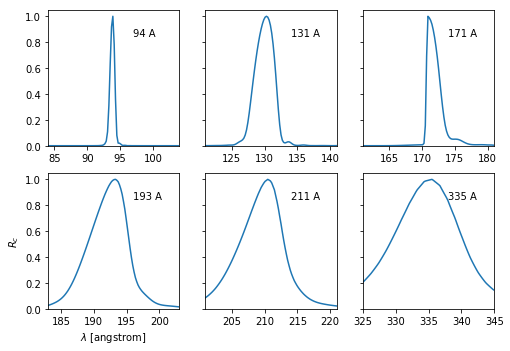

In [38]:
fig,axes = plt.subplots(2,3,figsize=(8,5.5),sharey=True)
for c,ax in zip(aia.channels,axes.flatten()):
    wave = np.linspace(c['wavelength'].value-10,c['wavelength'].value+10,100)*u.angstrom
    r = splev(wave.value,c['wavelength_response_spline'])
    ax.plot(wave,r/r.max())
    ax.set_xlim(c['wavelength'].value-10,c['wavelength'].value+10)
    ax.text(c['wavelength'].value+3,0.85,f'{c["wavelength"].value:.0f} A')
#plt.subplots_adjust(hspace=0.3,wspace=0.3)
axes[1,0].set_xlabel(r'$\lambda$ [angstrom]')
axes[1,0].set_ylabel(r'$R_c$ ')
axes[1,0].set_ylim(0,1.05)

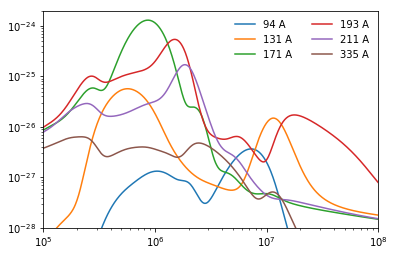

In [55]:
fig = plt.figure()
ax = fig.gca()
T = np.logspace(4,9,1000)*u.K
for i,c in enumerate(aia.channels):
    r = splev(T.value,c['temperature_response_spline'])
    ax.plot(T,r,label=f'{c["wavelength"].value:.0f} '+'A')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e5,1e8)
ax.set_ylim(1e-28,2e-24)
ax.legend(loc=1,frameon=False,ncol=2)

In [287]:
colors = seaborn.color_palette('colorblind',10)

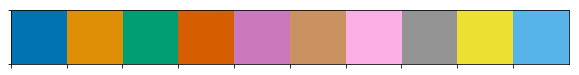

In [288]:
seaborn.palplot(colors)

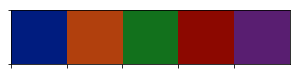

In [286]:
seaborn.palplot(seaborn.color_palette('dark',5))

## Atomic Physics

In [480]:
T = np.logspace(4,9,1000) * u.K
test_ion = fiasco.Ion('Fe 12',T)

In [237]:
wvls = const.h*const.c/test_ion._scups['delta_energy'] 

In [221]:
wvls.to(u.angstrom)

<Quantity [2406.30327582, 2169.6834537 , 1349.42551541, ...,   76.57706307,
             76.57706307,   76.3205235 ] Angstrom>

In [209]:
level_labels = np.array([f'$^{s}{L}_{{{str(Fraction(j))}}}$' for j,L,s in zip(test_ion._elvlc['J'].value,test_ion._elvlc['L_label'],test_ion._elvlc['multiplicity'])])

In [217]:
' '.join(test_ion[-1].configuration.split('.'))

'2s2 2p2(1D) 3p'

In [208]:
i_upper = vectorize_where(test_ion._elvlc['level'])

['$^4S_{3/2}$',
 '$^2D_{5/2}$',
 '$^2D_{3/2}$',
 '$^2P_{1/2}$',
 '$^2P_{3/2}$',
 '$^4P_{5/2}$',
 '$^4P_{3/2}$',
 '$^4P_{1/2}$',
 '$^2D_{5/2}$',
 '$^2D_{3/2}$',
 '$^4P_{1/2}$',
 '$^4P_{3/2}$',
 '$^4P_{5/2}$',
 '$^2P_{1/2}$',
 '$^2P_{3/2}$',
 '$^2S_{1/2}$',
 '$^2S_{1/2}$',
 '$^4D_{1/2}$',
 '$^4D_{3/2}$',
 '$^4D_{5/2}$',
 '$^4D_{7/2}$',
 '$^2D_{5/2}$',
 '$^2D_{3/2}$',
 '$^4P_{1/2}$',
 '$^4P_{3/2}$',
 '$^4P_{5/2}$',
 '$^2D_{3/2}$',
 '$^2D_{5/2}$',
 '$^4S_{3/2}$',
 '$^2P_{3/2}$',
 '$^2P_{1/2}$',
 '$^2P_{1/2}$',
 '$^2P_{3/2}$',
 '$^2F_{5/2}$',
 '$^2F_{7/2}$']

In [238]:
ups = test_ion.effective_collision_strength()

In [225]:
np.argsort(np.fabs(wvls.to(u.angstrom) - 192.39*u.angstrom))

array([ 6433, 12770,    28, ..., 17138, 16245, 14456])

In [226]:
wvls[_[:10]].to(u.angstrom)

<Quantity [192.37218716, 192.41280628, 192.41280628, 192.33158517,
           192.45344257, 192.45344257, 192.29100033, 192.209882  ,
           192.209882  , 192.209882  ] Angstrom>

In [232]:
test_ion.transitions.wavelength[np.argsort(np.fabs(test_ion.transitions.wavelength - 192.39*u.angstrom))]

<Quantity [  192.393,   192.394,   192.384, ..., 15605.   , 22063.   ,
           36523.   ] Angstrom>

In [254]:
top = np.argsort(ups[-1,:],)[::-1][:250]

In [264]:
top = np.where(np.logical_and(ups[0,:] < 1,ups[-1,:]>1e-3))[0]

In [346]:
mg6[0].multiplicity

TypeError: 'NoneType' object is not subscriptable

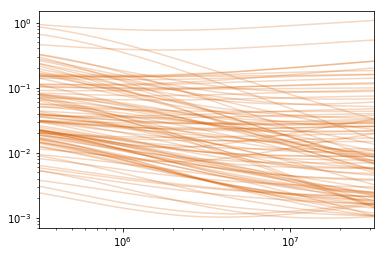

In [272]:
plt.plot(T,test_ion.effective_collision_strength()[:,top[:100]],color=colors[1],alpha=0.25);
plt.xscale('log')
plt.yscale('log')
#plt.ylim(1e-3,1e-1)
plt.xlim(T[0].value,T[-1].value);

In [289]:
foo = fiasco.Ion('Fe 11',T)

In [290]:
foo.transitions.wavelength[~foo.transitions.is_twophoton].shape

(82409,)

In [291]:
foo[-1]

Level: 996
Configuration: 3s2 3p2 3d 4s
Orbital Angular Momentum: G
Energy: 3.203670299620366e-10 erg

In [372]:
mg6 = fiasco.Ion('O 2',[1e6]*u.K)

In [373]:
n = np.logspace(3,12,100)*u.cm**(-3)

In [374]:
pop = mg6.level_populations(n)

In [375]:
pop.shape

(1, 100, 35)

In [351]:
' '.join(mg6[0].configuration.split('.'))

'2s2 2p3'

In [356]:
mg6[0].orbital_angular_momentum_label

'S'

In [376]:
def make_level_label(i):
    spec = r'$^{s}\mathrm{{{l}}}_{{{j}}}$'.format(
        j = str(Fraction(mg6[i].total_angular_momentum.value)),
        s = mg6._elvlc['multiplicity'][i],
        l = mg6[i].orbital_angular_momentum_label
    )
    return f"{' '.join(mg6[i].configuration.split('.'))} {spec}"

In [377]:
make_level_label(0)

'2s2 2p3 $^4\\mathrm{S}_{3/2}$'

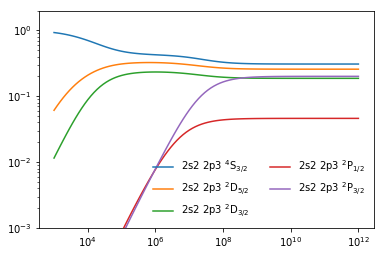

In [385]:
for i in range(5):
    plt.plot(n,pop[0,:,i],label=make_level_label(i));
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3,2)
plt.legend(loc=4,frameon=False,ncol=2)

In [386]:
mg6[0].level

1

In [415]:
fe18 = fiasco.Ion('Fe 16',np.logspace(4,9,1000)*u.K)

(1e-12, 1e-09)

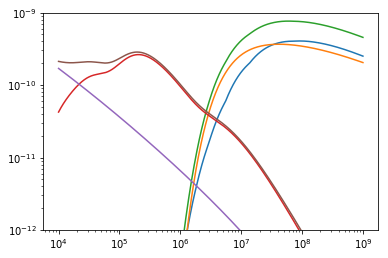

In [418]:
plt.plot(fe18.temperature,fe18.direct_ionization_rate())
plt.plot(fe18.temperature,fe18.excitation_autoionization_rate())
plt.plot(fe18.temperature,fe18.ionization_rate())
plt.plot(fe18.temperature,fe18.dielectronic_recombination_rate())
plt.plot(fe18.temperature,fe18.radiative_recombination_rate())
plt.plot(fe18.temperature,fe18.recombination_rate())
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-12,1e-9)

In [419]:
fe18._easplups

fe/fe_16/easplups -- v8.0.2

Fields
------
bt_c  -- upsilon coefficient
bt_type  -- Burgess-Tully scaling type
bt_upsilon  -- Burgess-Tully scaled effective collision strength
delta_energy (Ry) -- delta energy
gf  -- oscillator strength
lower_level  -- lower level index
upper_level  -- upper level index

Footer
------
file:  fe_16.easplups
excitation autoionization rate coefficient parameter file
derived from fits to experimental and theoretical data
Dere, K. P., 2007, A&A, 466, 771
ADS ref:  http://adsabs.harvard.edu/abs/2007A%26A...466..771D
created for CHIANTI database for astrophysical spectroscopy
created by Ken Dere  (GMU)  Fri Jan 26 12:40:29 2007

In [420]:
from fiasco.io import Parser

In [422]:
Parser('fe_16.easplups').parse()

lower_level,upper_level,bt_type,gf,delta_energy,bt_c,bt_upsilon [5]
,,,,Ry,,
int64,int64,int64,float64,float64,float64,float64
1,3,1,4.102,59.38,1.7,0.1732 .. 0.138
1,4,1,0.4576,74.48,1.7,0.03563 .. 0.01231


In [423]:
%%bash
head -n 100 /Users/willbarnes/ssw/packages/chianti/dbase/fe/fe_16/fe_16.easplups

 26 16  1  3  1 4.102e+00 5.938e+01 1.700e+00 1.732e-01 1.655e-01 1.595e-01 1.495e-01 1.380e-01
 26 16  1  4  1 4.576e-01 7.448e+01 1.700e+00 3.563e-02 3.233e-02 2.905e-02 2.366e-02 1.231e-02
-1
%file:  fe_16.easplups
%excitation autoionization rate coefficient parameter file
 derived from fits to experimental and theoretical data
Dere, K. P., 2007, A&A, 466, 771
ADS ref:  http://adsabs.harvard.edu/abs/2007A%26A...466..771D
 created for CHIANTI database for astrophysical spectroscopy
  created by Ken Dere  (GMU)  Fri Jan 26 12:40:29 2007
-1


In [427]:
Parser('fe_18.diparams').parse()

ip,bt_c,bt_e [9],bt_cross_section [9],ea
eV,,,cm2 eV2,
float64,float64,float64,float64,float64
1361.966,2.0,0.0 .. 1.0,0.0 .. 1.07537e-13,0.0
7953.876,2.0,0.0 .. 1.0,0.0 .. 5.6585999999999996e-14,0.0


In [426]:
fe18._diparams['ea']

array([1., 1.])

In [443]:
fe = fiasco.Element('Fe',np.logspace(4,9,1000)*u.K)

(1e-12, 1e-09)

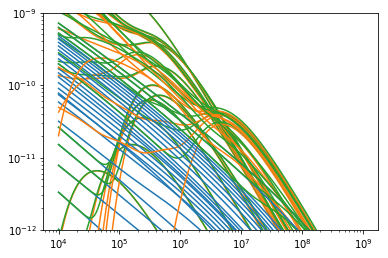

In [445]:
for i in fe:
    rr = i.radiative_recombination_rate()
    dr = i.dielectronic_recombination_rate()
    if rr is not None:
        plt.plot(i.temperature, rr, color='C0')
    if dr is not None:
        plt.plot(i.temperature, dr, color='C1')
    plt.plot(i.temperature, i.recombination_rate(), color='C2')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-12,1e-9)

In [446]:
ioneq = fe.equilibrium_ionization()

In [447]:
ioneq.shape

(1000, 27)

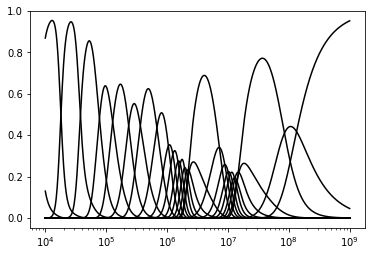

In [451]:
for i in range(ioneq.shape[1]):
    plt.plot(fe[i].temperature, ioneq[:,i],color='k')
plt.xscale('log')

Text(0.5, 1.0, 'Si 4')

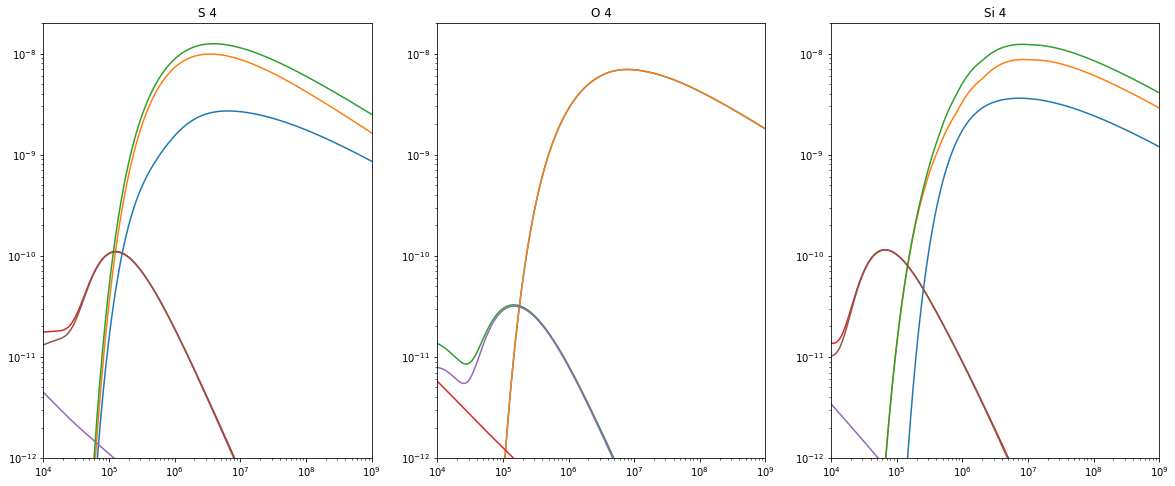

In [478]:
plt.figure(figsize=(20,8))
s4 = fiasco.Ion('S 4',np.logspace(4,9,1000)*u.K)
plt.subplot(131)
plt.plot(s4.temperature, s4.excitation_autoionization_rate())
plt.plot(s4.temperature, s4.direct_ionization_rate())
plt.plot(s4.temperature, s4.ionization_rate())
plt.plot(s4.temperature, s4.recombination_rate())
plt.plot(s4.temperature, s4.radiative_recombination_rate())
plt.plot(s4.temperature, s4.dielectronic_recombination_rate())
plt.xscale('log')
plt.yscale('log')
plt.xlim(s4.temperature[[0,-1]].value)
plt.ylim(1e-12,2e-8)
plt.title(s4.ion_name)
s4 = fiasco.Ion('O 4',np.logspace(4,9,1000)*u.K)
plt.subplot(132)
#plt.plot(s4.temperature, s4.excitation_autoionization_rate())
plt.plot(s4.temperature, s4.direct_ionization_rate())
plt.plot(s4.temperature, s4.ionization_rate())
plt.plot(s4.temperature, s4.recombination_rate())
plt.plot(s4.temperature, s4.radiative_recombination_rate())
plt.plot(s4.temperature, s4.dielectronic_recombination_rate())
plt.xscale('log')
plt.yscale('log')
plt.xlim(s4.temperature[[0,-1]].value)
plt.ylim(1e-12,2e-8)
plt.title(s4.ion_name)
s4 = fiasco.Ion('Si 4',np.logspace(4,9,1000)*u.K)
plt.subplot(133)
plt.plot(s4.temperature, s4.excitation_autoionization_rate())
plt.plot(s4.temperature, s4.direct_ionization_rate())
plt.plot(s4.temperature, s4.ionization_rate())
plt.plot(s4.temperature, s4.recombination_rate())
plt.plot(s4.temperature, s4.radiative_recombination_rate())
plt.plot(s4.temperature, s4.dielectronic_recombination_rate())
plt.xscale('log')
plt.yscale('log')
plt.xlim(s4.temperature[[0,-1]].value)
plt.ylim(1e-12,2e-8)
plt.title(s4.ion_name)

In [481]:
fe = fiasco.Element('iron',T)

In [482]:
rm = fe._rate_matrix()

In [495]:
np.allclose(np.linalg.det(rm.value),0,atol=1e-100,rtol=0)

True

In [497]:
u,s,v = np.linalg.svd(rm.value)

In [503]:
s[100,:]

array([6.84600077e-09, 6.77978461e-09, 3.67330214e-09, 2.69480565e-09,
       2.66206943e-09, 1.88608580e-09, 1.68386671e-09, 1.31417980e-09,
       9.74002689e-10, 8.52340658e-10, 7.73819304e-10, 5.92170316e-10,
       4.73198017e-10, 4.27122090e-10, 3.55743098e-10, 2.79407966e-10,
       2.35776633e-10, 1.56262429e-10, 1.41502534e-10, 1.21806415e-10,
       8.43556712e-11, 3.08526373e-11, 1.38378182e-11, 6.95606072e-12,
       3.33376000e-12, 8.25795148e-13, 2.96154854e-24])

In [504]:
ioneq = fe.equilibrium_ionization()

In [505]:
ioneq.shape

(1000, 27)

Text(0, 0.5, '$f_{X,k}$')

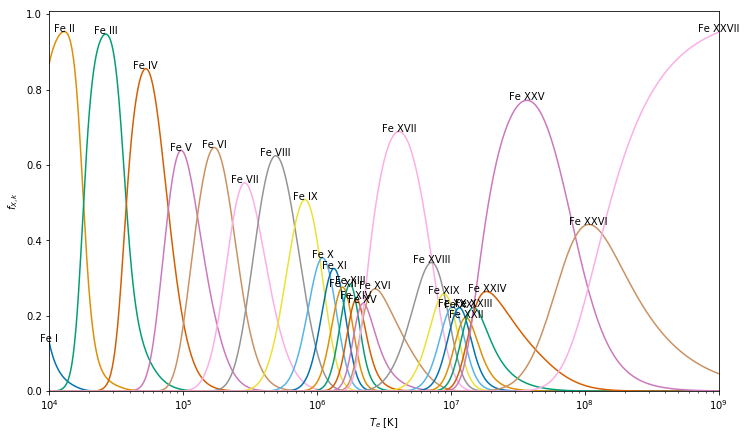

In [528]:
fe = fiasco.Element('Fe',T)
ioneq = fe.equilibrium_ionization()
fig = plt.figure(figsize=(12,7))
ax = fig.gca()
for i in fe:
    ax.plot(fe.temperature,ioneq[:,i.charge_state],
            color=seaborn.color_palette('colorblind',1000)[i.charge_state],
            label=roman.toRoman(i.ionization_stage))
    Tmax = fe.temperature[np.argmax(ioneq[:,i.charge_state])]
    fmax = np.max(ioneq[:,i.charge_state])
    ax.text(Tmax.value,fmax.value,f'{fe.atomic_symbol} {roman.toRoman(i.ionization_stage)}',horizontalalignment='center',rotation=0)
ax.set_xscale('log')
ax.set_xlim(fe.temperature[[0,-1]].value)
ax.set_ylim(0,1.01)
ax.set_xlabel(r'$T_e$ [K]')
ax.set_ylabel(r'$f_{X,k}$')
ax.
#ax.legend()

In [543]:
np.arange(0.2,1.2,0.2)

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [ ]:
fiasco.Ion()

In [612]:
fe = fiasco.Element('iron', [1e6,2.5e6]*u.K, ioneq_filename = 'mazzotta_etal')

In [599]:
ne = 1e9*u.cm**(-3)

In [600]:
gain = fe[13].ionization_rate()[1]*fe[13].ioneq[0] + fe[15].recombination_rate()[1]*fe[15].ioneq[0]
loss = fe[14].ionization_rate()[1]*fe[14].ioneq[0] + fe[14].recombination_rate()[1]*fe[14].ioneq[0]

In [601]:
tau_cie = 1/(ne*(gain - loss))

In [602]:
tau_cie.to(u.s)

<Quantity 8286.49384528 s>

In [603]:
gain.to(u.cm**3/u.s)

<Quantity 1.2474613e-13 cm3 / s>

In [604]:
loss.to(u.cm**3/u.s)

<Quantity 4.06782901e-15 cm3 / s>

In [608]:
fe[15].ioneq[0]

<Quantity 0.>

In [609]:
fe[13]

CHIANTI Database Ion
---------------------
Name: Fe 14
Element: iron (26)
Charge: +13
Number of Levels: 739
Number of Transitions: 42667

Temperature range: [1.0 MK, 2.5 MK]

HDF5 Database: /Users/willbarnes/.fiasco/chianti_dbase.h5
Using Datasets:
  ioneq: mazzotta_etal_ext
  abundance: sun_photospheric_1998_grevesse
  ip: chianti

In [611]:
fe[13]._ioneq['mazzotta_etal_ext']

fe/fe_14/ioneq/mazzotta_etal_ext -- v8.0.2

Fields
------
ionization_fraction  -- ionization fraction
temperature (K) -- temperature

Footer
------
filename: mazzotta_etal_ext.ioneq
ionization equilibrium: Mazzotta,P., Mazzitelli,G., Colafrancesco,S., Vittorio,N., 1998, AASS, 133, 403
ionization equilibrium Cu and Zn: Landini, M., Monsignori Fossi, B.C., 1991, AASS, 91, 183
produced as part of the Arcetri/Cambridge/NRL 'CHIANTI' atomic data base collaboration
Enrico Landi Jan 2003

In [620]:
fe[12].ioneq[0]

<Quantity 0.02123>

In [625]:
np.where(fe[13]._ioneq['mazzotta_etal']['temperature'].to(u.MK) == 1*u.MK)

(array([20]),)

In [637]:
fe[10]._ioneq['mazzotta_etal_9']['ionization_fraction'][20]

<Quantity 0.2291>

In [638]:
import sunpy.map

In [650]:
m = sunpy.map.Map('/Users/willbarnes/Documents/work/papers/synthetic-observables-paper-observations/paper/data/observations/aia_lev1.5_20110212T153248_171_cutout.fits')

/Users/willbarnes/anaconda/envs/dissertation/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


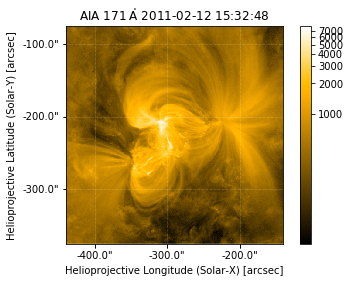

In [651]:
m.peek()
plt.show()

In [661]:
d = np.where(m.data < 0, 0, m.data)
d = np.ones(m.data.shape) * m.data.mean()
p = np.random.poisson(d)

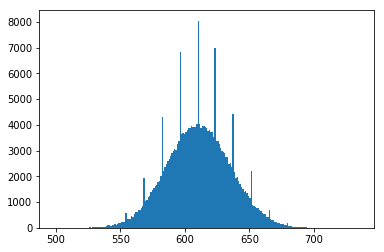

In [666]:
plt.hist(p.flatten(),bins='fd');

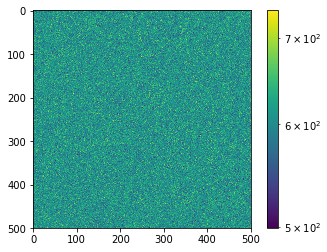

In [662]:
plt.imshow(np.flipud(p),norm=matplotlib.colors.LogNorm())
plt.colorbar()

In [657]:
(p == m.data).all()

False

In [658]:
p

array([[578, 549, 551, ..., 282, 320, 283],
       [555, 594, 494, ..., 329, 257, 281],
       [551, 563, 497, ..., 296, 261, 308],
       ...,
       [337, 339, 359, ..., 184, 195, 201],
       [361, 348, 306, ..., 193, 197, 211],
       [380, 359, 328, ..., 227, 181, 242]])

In [659]:
d

array([[558.10642392, 535.91278821, 541.58199225, ..., 274.89847357,
        290.72194175, 280.94917109],
       [542.53760846, 540.77235835, 531.8844038 , ..., 292.39513697,
        270.44860073, 280.77079758],
       [555.80910413, 535.5414472 , 494.175435  , ..., 284.19780501,
        282.29109354, 319.72437224],
       ...,
       [357.37009668, 344.78641221, 334.41413273, ..., 200.56402929,
        213.45745557, 229.25911162],
       [336.81832827, 353.88294572, 327.41068991, ..., 209.93100725,
        210.24994952, 214.88314336],
       [353.26718366, 372.35439449, 330.50315696, ..., 205.55813814,
        200.45601201, 203.46667761]])

In [667]:
foo = np.random.rand(100)

In [668]:
foo.mean()

0.5679545749154763

In [669]:
(foo - foo.mean()).mean()

4.440892098500626e-18

In [670]:
foo.std()

0.2865345980264491

In [671]:
((foo - foo.mean())/foo.std()).std()

1.0

In [673]:
he2 = fiasco.Ion('He 2',np.logspace(3,5,1000)*u.K)

In [675]:
he2.transitions.wavelength

<Quantity [    0.   ,   303.786,   303.781,   256.318,   256.317,
             243.027,   243.027,   237.331,   237.331,  1640.394,
            1640.348,  1215.108,  1215.097,  1084.92 ,  1084.915,
            1640.378,  1640.536,  1215.1  ,  1215.187,  1084.914,
            1084.982,  1640.336,  1640.493,  1640.477,  1215.09 ,
            1215.177,  1215.173,  1084.91 ,  1084.978,  1084.977,
            4686.889,  4686.724,  3203.931,  3203.892, 10126.088,
           10125.704,  4686.847,  4687.225,  3203.915,  3204.091,
            4686.696,  4687.074,  4687.026,  3203.879,  3204.056,
            3204.043, 10125.64 , 10126.408, 10126.28 , 10125.992,
           10126.761,  4687.239,  4687.074,  4687.204,  3204.094,
            3204.056,  3204.117, 10126.793, 10126.408, 10126.633,
           10126.44 , 10126.537,  4687.026,  4687.156,  4687.129,
           10126.28 , 10126.505, 10126.44 ] Angstrom>

In [680]:
he2.transitions.is_twophoton

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [683]:
(41*u.arcmin / 4096).to(u.arcsec)

<Quantity 0.60058594 arcsec>